In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ruta_dataset_mejorado = "../../Limpieza/data/df_mejorado_ing_caract.csv"
df = pd.read_csv(ruta_dataset_mejorado)


In [4]:
print(f"Estructura del dataset:\n{df.info()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917885 entries, 0 to 917884
Data columns (total 39 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   AÑO                                                              917885 non-null  int64  
 1   TRIMESTRE                                                        917885 non-null  float64
 2   PROVEEDOR                                                        917885 non-null  object 
 3   CÓDIGO DANE                                                      917885 non-null  float64
 4   DEPARTAMENTO                                                     917885 non-null  object 
 5   CÓDIGO DANE.1                                                    917885 non-null  float64
 6   MUNICIPIO                                                        917885 non-null  object 
 7   VELOCIDAD BAJADA             

In [5]:
df = df[(df['VELOCIDAD BAJADA'] > 0) & (df['VELOCIDAD SUBIDA'] > 0)]


In [6]:
print(f"Total de registros después del filtrado: {len(df)}")


Total de registros después del filtrado: 92687


In [7]:
X = df[['AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA',
        'Latitud', 'Longitud', 'Tasa_Crecimiento', 'Densidad_Accesos',
        'Promedio_Movil', 'Indice_Velocidad']]
y = df['No. ACCESOS FIJOS A INTERNET']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
print(f"Forma de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}, y_test: {y_test.shape}")


Forma de X_train: (74149, 10), y_train: (74149,)
Forma de X_test: (18538, 10), y_test: (18538,)


In [10]:
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
y_pred = modelo_rf.predict(X_test)


In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")


Error cuadrático medio (MSE): 313.750511133887
Coeficiente de determinación (R²): 0.9951003949783555


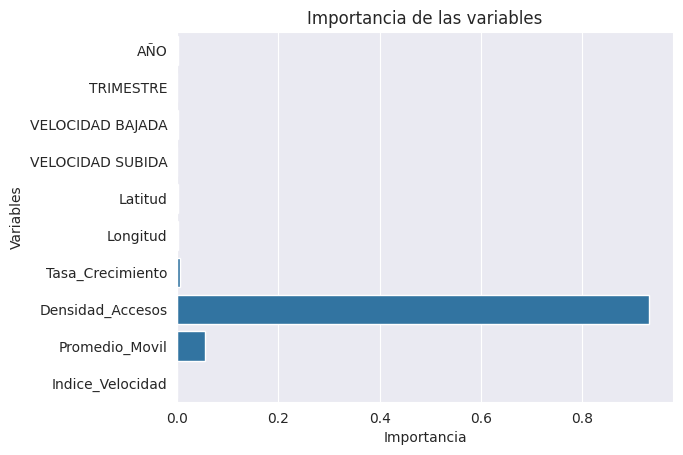

In [13]:
importancias = modelo_rf.feature_importances_
sns.barplot(x=importancias, y=X.columns)
plt.title('Importancia de las variables')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.show()


# Conclusiones del Modelo Random Forest con Ingeniería de Características

## 1. Desempeño del Modelo
- **Error Cuadrático Medio (MSE):** Pasó de **215,128.72** (modelo original) a **313.75** (modelo con nuevas características). Esto representa una mejora drástica en la precisión de las predicciones.
- **Coeficiente de Determinación (R²):** Aumentó de **0.22** a **0.995**, indicando que el modelo ahora es capaz de explicar el **99.5% de la variabilidad en los datos**.

## 2. Importancia de las Nuevas Características
- Las características añadidas durante la ingeniería de características, como **Tasa de Crecimiento**, **Densidad de Accesos** y **Promedio Móvil**, han tenido un impacto significativo en el desempeño del modelo.
- La inclusión de estas variables permitió al modelo capturar mejor la dinámica subyacente en los datos, mejorando su capacidad predictiva.

## 3. Observaciones
- El modelo es ahora mucho más robusto gracias a las características adicionales. Esto resalta la importancia de la ingeniería de características en la construcción de modelos predictivos efectivos.
- La drástica reducción en el MSE y el aumento en el R² indican que el modelo se ajusta mejor a los datos y tiene una capacidad predictiva mucho mayor.

## 4. Siguientes Pasos
1. **Optimización del Modelo:**
   - Realizar tuning de hiperparámetros del Random Forest (e.g., número de árboles, profundidad máxima) para identificar configuraciones que puedan mejorar aún más el desempeño.
2. **Evaluación con otros Modelos:**
   - Probar modelos más avanzados como **XGBoost**, **LightGBM** o **Redes Neuronales** para comparar su desempeño con el Random Forest mejorado.
3. **Validación Cruzada:**
   - Implementar validación cruzada para asegurar que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento.
4. **Interpretación del Modelo:**
   - Analizar las características más importantes en el modelo para identificar tendencias clave en los datos y comprender mejor los factores que impulsan los accesos fijos a internet.

## 5. Conclusión General
La ingeniería de características ha transformado un modelo de rendimiento moderado en un modelo altamente preciso y explicativo. Este resultado demuestra la importancia de entender los datos y enriquecerlos antes de entrenar un modelo, ya que las nuevas características han sido cruciales para este avance.

Con este modelo, estamos en una excelente posición para realizar predicciones confiables y explorar aplicaciones prácticas en la planificación y mejora del acceso a internet.
